### <br><b> Introduction to data analysis_TP1</b>

-->*This document can't be modified. You don't have the authority to save changes to this notebook. So be sure you download your work before exiting! (use the above **download** buttun)* 

Most optical sensors have two defects: 1) a *"thermal"* noise like many other sensors, and 2) a non-zero level even when they are black, which calls *"dark current"*. We will try to measure this level on the cameras of your cell phones.

Our objective here is to introduce you to numppy, matplotlib packages:
- Numpy library adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays (eg. max/min, mean, standard deviation). 
- And matplotlib library allows to create static, animated, and interactive visualizations in Python

<br><b>Tasks:</b>
> 1 - Take a photo by obstructing the lens of your mobile phone as best as possible and transfer the file to your computer (by email or otherwise). In jupyter, use "upload" to transfer your image to "/Data/Photo" file in your notebook space.
<br><br>2 - Open the image as laid later on 
<br><br>3-plot the data with the plot command of matplotlib (find its use on the internet). Note that due to the "import maplotlib.pyplot as plt" command, you will have prefix "plt. " for all matplotlib commands. In some examples on the internet you might encounter a different prefix or even sometimes no prefix. These examples will have to be adapted ...
<br><br>4 -Select a region of your photo, change its color and copy paste some objects within the photo
<br><br>4 - with numpy, calculate the min, max and median values, the mean and the standard deviation. Same remark as above, because of the command "import numpy as np", it will be necessary to have prefix "np. » for all numpy commands.
<br><br>5 - Does your camera have a non-zero "dark currnet"?
<br><br>6 - plot the histogram with matplotlib. Choose the limits (look for the doc on the internet) to see what happens close to 0.
<br><br>7 - To go further: with numpy calculate the% of values = 0, and the% of values <= 1
<br><br>8 - Increase the luminosity of the photo and display it using the function imshow. How do you interpret white pixels in the output ?
<br><br>9 - Determine the average grain size using :
    <br>  a) autocorrelation functions from the statsmodel package
    <br>  b) Fourier transforms from numpy.fft
<br><br>10 - Is there a qualitative difference between the horizontal and vertical length scales ?


 



    

### >> <b> Load Libraries</b>
First step is to import all libraries that will be used!

In [4]:
# to render your plots in your notebook %matplotlib inline 
%matplotlib inline 
import matplotlib.pyplot as plt # for plots 
import numpy as np
import imageio as im # to read image data

## >> <b> Let's get started </b>


#### <b>1)  Import your image </b>
For that we will use **imageio** library, and function imread
<br><b> /!\ </b> Do not forget to change the path/name of the photo ^^

In [1]:
#img=im.imread('~/TP_master/Data/Photo/JOMAA_photo.jpg')
#img=im.imread('~/TP_master/Data/Photo/color.jpg')
img=im.imread('~/TP_master/Data/Photo/kitty.jpeg')

NameError: name 'im' is not defined

#### <b> 2) PLot the image </b>


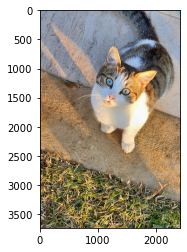

In [3]:
plt.imshow(img)

#### <b> 3) Accessing Image Properties </b>
Check the shape and size of your image
<br>As you can see for BGR image, it returns an array of Blue, Green, Red values.

In [4]:
img.shape # image shape (height,width,channels)
img.size  # total number of pixels 

# To print the results:
print(img.shape)
print(img.size)

(3737, 2414, 3)
27063354


> <b>Why it's important to check the shape of the image :)</b>
 <br>If an image is grayscale, the returned array will only contain the number of rows and columns, so it is a good method to check whether the loaded image is grayscale or color. Do not hesitate to try it if you are curious ^_^

<br>You can access a pixel value by its row and column coordinates:

In [5]:
px = img[100,100]
print( px )

# accessing only blue pixel
blue = img[100,100,0]
print(blue)

# accessing only blue channel
B=img[:,:,0].flatten()
print(B)

[148 159 179]
148
[144 142 142 ... 148 160 161]


> <b>Selecting </b>
>The above method is normally used for selecting a region of an array, say the first 10 rows and last 2 columns. 
> For individual pixel access, the Numpy array methods, **array.item()** and **array.itemset()** are considered better. They always return a scalar, however, so if you want to access all the B,G,R values, you will need to call **array.item()** separately for each value.

## **Let's have some fun ^_^**

- Select a region of your photo (eg: eyes)
- change the color of this region
- Select an object in the image and paste it to another region 

You may think of using **np.random.randn & np.random.radint()** for generating random numbers for to get new colors ;) 

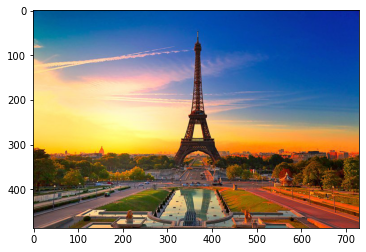

In [6]:
eiffel=im.imread('~/TP_master/Data/Photo/color.jpg')
plt.imshow(eiffel)

In [7]:
eiffelz = eiffel[0:350, 300:500]
img2=eiffel
img2[0:350, 50:250] = eiffelz
img2[0:350, 500:700] = eiffelz

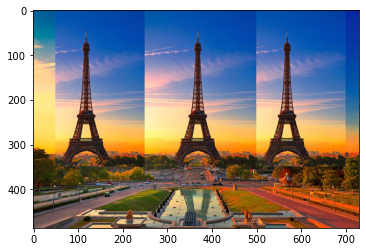

In [8]:
plt.imshow(img2)

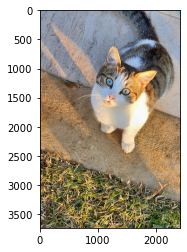

In [11]:
img=im.imread('~/TP_master/Data/Photo/oscar.jpeg')
img_b=im.imread('~/TP_master/Data/Photo/oscar.jpeg')
img_bg=im.imread('~/TP_master/Data/Photo/oscar.jpeg')
plt.imshow(img)

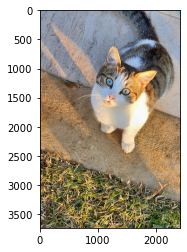

In [6]:
img=im.imread('~/TP_master/Data/Photo/oscar.jpeg', as_gray=False, pilmode="RGB")
plt.imshow(img)

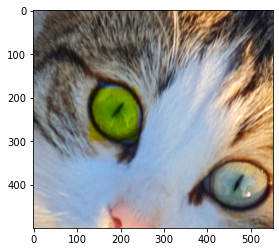

In [12]:
eyes=img[1000:1500, 1000:1550]
eyes[180:300,130:240,2]=0
#img[1180:1300,1130:1240]
#plt.imshow(img[1000:1500, 1000:1550])
plt.imshow(eyes)

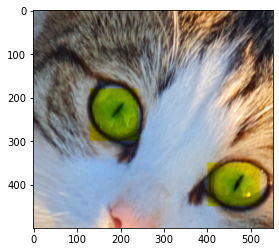

In [85]:
eyes[350:450,400:520,2]=0
plt.imshow(eyes)

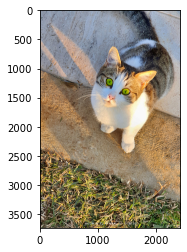

In [86]:
img_g=img
img_g[1180:1300,1130:1240,2]=0
img_g[1350:1450,1400:1520,2]=0
plt.imshow(img_g)

In [87]:
len(np.where(img_g[1180:1300,1130:1240,0]>img_g[1180:1300,1130:1240,1])[0])

2062

In [88]:
len(np.where(img_g[1180:1300,1130:1240,0]<img_g[1180:1300,1130:1240,1])[0])

10937

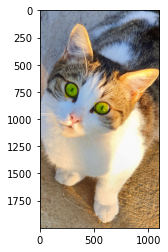

In [89]:
plt.imshow(img[500:2500,900:2000])
# plt.savefig('green_kitty.jpg')


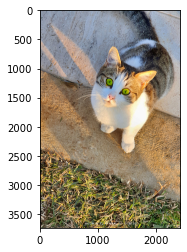

In [90]:
plt.imshow(img)

In [91]:
img_bg[1737:3737,0:1100]=img_g[500:2500,900:2000]

In [92]:
3737-2000

1737

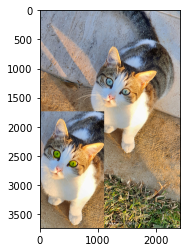

In [93]:
plt.imshow(img_bg)
plt.savefig('/home/fjomaa/TP_master/Data/Photo/oscar_bg.png',bbox_inches='tight')

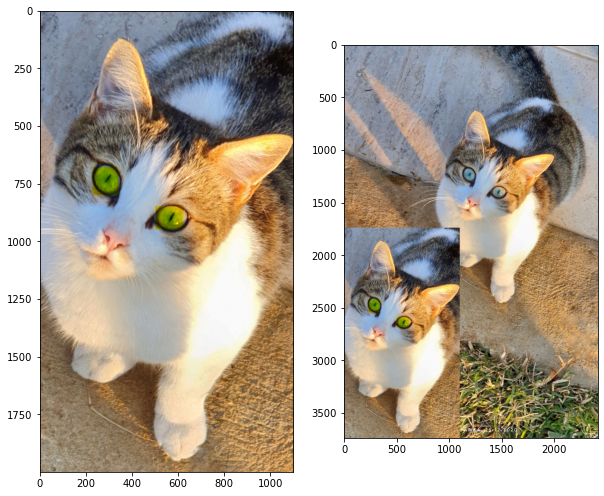

In [96]:
#fig, axs = plt.subplots(ncols=2)
fig, axs = plt.subplots(ncols=2, figsize=(10, 15))
# fig.suptitle('Vertically stacked subplots')
axs[0].imshow(img[500:2500,900:2000])
axs[1].imshow(img_bg)
#plt.savefig('/home/fjomaa/TP_master/Data/Photo/oscar_2.png',bbox_inches='tight')

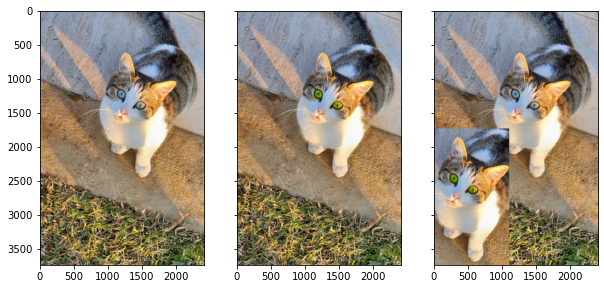

In [98]:
#fig, axs = plt.subplots(ncols=2)
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(10, 15))
# fig.suptitle('Vertically stacked subplots')
axs[0].imshow(img_b)
axs[1].imshow(img_g)
axs[2].imshow(img_bg)
plt.savefig('/home/fjomaa/TP_master/Data/Photo/oscar_2.png',bbox_inches='tight')

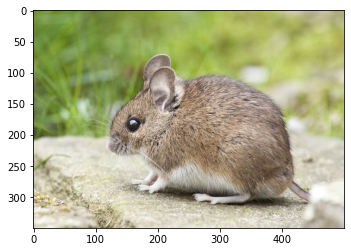

In [36]:
black=im.imread('~/TP_master/Data/Photo/black.jpeg')
plt.imshow(black)

In [37]:
mouse.shape

(350, 500, 3)

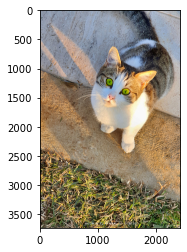

In [38]:
plt.imshow(img)

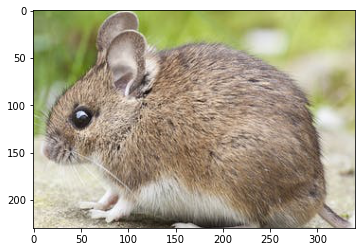

In [66]:
plt.imshow(mouse[70:300,110:450])

In [106]:
img[3000:3350,1000:1500]=mouse

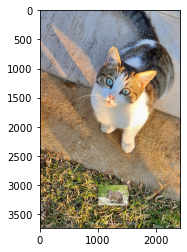

In [107]:
plt.imshow(img)

In [91]:
i=img[500:2500,900:2500]
i[1500:1730,900:1240]=mouse[70:300,110:450]

In [ ]:
img = cv2.resize(mouse, self.img_res)


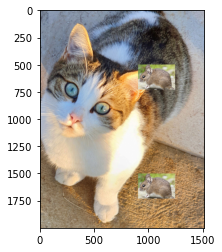

In [92]:
plt.imshow(i)

In [94]:
mouse.resize((128, 128))

ValueError: cannot resize this array: it does not own its data

In [85]:
900+340

1240

In [96]:
import imageio
from PIL import Image

#img = imageio.imread('path/to/your/image.png')
img = Image.fromarray(img).resize((128, 128))

In [ ]:
img[1180:1300,1130:1240,2]=0

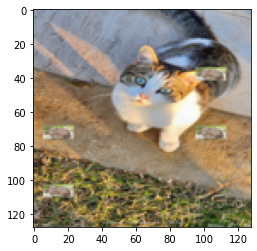

In [97]:
plt.imshow(img)

#### <b> 4) Statistical analysis </b>
For each channel:
Calculate max,min, mean, standard deviation using numpy 

In [17]:
B,G,R= img[:,:,0],img[:,:,1],img[:,:,2]

(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 5.600000e+01, 2.580000e+02,
        2.550000e+02, 3.670000e+02, 7.060000e+02, 9.470000e+02,
        1.087000e+03, 1.282000e+03, 4.293000e+03, 1.319500e+04,
        2.051154e+06]),
 array([180.  , 183.04, 186.08, 189.12, 192.16, 195.2 , 198.24, 201.28,
        204.32, 207.36, 210.4 , 213.44, 216.48, 219.52, 222.56, 225.6 ,
        228.64, 231.68, 234.72, 237.76, 240.8 , 243.84, 246.88, 249.92,
        252.96, 256.  ]),
 <BarContainer object of 25 artists>)

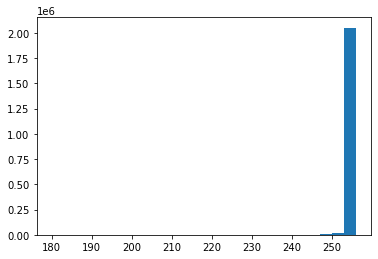

In [61]:
plt.hist(B,bins=25,range=(180,256))

In [ ]:
x=np.empty((1920, 1080, 3))

In [8]:
x=np.random.randn(1920,1080,3)

In [93]:
(np.where(x[:,:,0]<0)[0]).reshape(1080,1920)


In [114]:
(np.where(x<0)[0])=np.random.radint(3108890)

AttributeError: module 'numpy.random' has no attribute 'radint'

In [92]:
import random
np.random.randint(0, 255,  )

array([ 94, 158,  96,  78, 122,  33])

In [86]:
randomlist = random.sample(range(10, 30), 5)

In [ ]:
3108890

In [74]:
len(np.where(x<0)[2])

3108389